In [783]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/praveen/MSDS/MachineLearning/KaggleChallenges/Challenge2/Data'

In [784]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_4641/2922911961.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


In [785]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")
cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']
test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]



/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_4641/1325753709.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


# Missing Values analysis:

In [786]:
# fake_missing_values = ['0', '0.0', 'Uncoded', 'None', '']
# for col in cat_vars:
#     col_values = train[col].astype(str)
#     value_counts = col_values[col_values.isin(fake_missing_values)].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Replacing total {value_counts.sum()} entries with 'Other_{col}'")
        
#         train.loc[col_values.isin(fake_missing_values), col] = f"Other_{col}"
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")


In [787]:
fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = train[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(train[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
train.drop(index=rows_to_drop, inplace=True)
train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0      1468
→ Found 1468 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        4431
→ Found 4431 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 4447 rows from train DataFrame.


In [788]:
### Check fake missing values for test data

fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = test[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(test[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
test.drop(index=rows_to_drop, inplace=True)
test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0       952
→ Found 952 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        2895
→ Found 2895 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 2910 rows from train DataFrame.


In [789]:
print(train.shape, test.shape)

(168401, 57) (112322, 58)


In [790]:
cols = ["governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd",
        "house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd",
        "senate_contribution_ratio",    "senate_contributions_sum_2010_usd", "contribution_sum_2010_usd",
        "us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd",
        "us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"
        ]
train[cols].iloc[1435:1438]


,governor_contribution_ratio,governor_contributions_sum_2010_usd,contribution_sum_2010_usd,house_and_assembly_contribution_ratio,house_and_assembly_contributions_sum_2010_usd,contribution_sum_2010_usd,senate_contribution_ratio,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_house_contribution_ratio,us_house_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contribution_ratio,us_senate_contributions_sum_2010_usd,contribution_sum_2010_usd
1435,0.139877,2284.93,16335.31,0.215339,3517.63,16335.31,0.644784,10532.75,16335.31,0.0,0.0,16335.31,0.0,0.00,16335.31
1436,0.0,0.00,8065.60,0.000000,0.00,8065.60,0.0,0.00,8065.60,1.0,8065.6,8065.60,0.0,0.00,8065.60
1437,0.0,0.00,1497.66,0.000000,0.00,1497.66,0.0,0.00,1497.66,0.0,0.0,1497.66,1.0,1497.66,1497.66


In [791]:
train[train_num_vars] = train[train_num_vars].apply(pd.to_numeric, errors='coerce')
test[test_num_vars] = test[test_num_vars].apply(pd.to_numeric, errors='coerce')

In [792]:

# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

In [793]:
# Drop states with count less than 5
state_counts = train['state'].value_counts()

# Filter to keep only states with at least 5 records
train = train[train['state'].isin(state_counts[state_counts >= 10].index)]


In [794]:
# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = train.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")

🔍 Number of duplicate rows in train: 2172
🔍 Number of duplicate rows in test: 2172
✅ Duplicates removed for train. New shape: (166203, 57)
✅ Duplicates removed for test. New shape: (112322, 58)


# Check association between categorical variables and target variable

In [795]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 135 categories:
🧪 ANOVA → F/t-stat = 19.0330, p-value = 0.0000e+00

📊 Analyzing 'city' with 8778 categories:
🧪 ANOVA → F/t-stat = 1.6992, p-value = 6.5575e-301

📊 Analyzing 'zip_code' with 15454 categories:
🧪 ANOVA → F/t-stat = 1.5328, p-value = 1.2756e-314

📊 Analyzing 'specific_sector' with 408 categories:
🧪 ANOVA → F/t-stat = 8.4620, p-value = 0.0000e+00

📊 Analyzing 'state' with 35 categories:
🧪 ANOVA → F/t-stat = 107.5214, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 1056.4242, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test         stat        p_value
0    general_sector  ANOVA    19.032950   0.000000e+00
3   specific_sector  ANOVA     8.461971   0.000000e+00
4             state  ANOVA   107.521373   0.000000e+00
5  contributor_type  ANOVA  1056.424172   0.000000e+00
2          zip_code  ANOVA     1.532842  1.275586e-314
1          

### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

In [796]:
train.drop(["city", "zip_code"], axis=1, inplace= True)
test.drop(["city", "zip_code"], axis=1, inplace= True)

In [797]:
train.general_sector.value_counts().to_clipboard()

## Bucketize different general sector categories into bigger category

In [798]:

# 1) define umbrella buckets and list the exact sectors that go into each
umbrella_map = {
    "Unknown / Uncoded": [
        "Uncoded",
        "No Employer Listed or Found",
        "Employer Listed/Category Unknown",
        "Generic Occupation/Category Unknown",
        "Other",
        "Other/Single Issue Groups",
        "Non-Contribution",
        "Unitemized Contributions",
        "Balance Forward",
    ],
    "Retired / Homemakers": [
        "Retired",
        "Homemakers/Non-income earners",
    ],
    "Legal & Lobbying": [
        "Lawyers & Lobbyists",
        "Accountants",
    ],
    "Public Sector & Campaigns": [
        "Civil Servants/Public Officials",
        "Candidate Contributions",
        "Candidate Committees",
        "Joint Candidate Committee",
        "Party Committees",
        "Leadership PACs",
        "Public Sector Unions",
        "Transportation Unions",
    ],
    "Health & Pharma": [
        "Health Professionals",
        "Health Services",
        "Hospitals & Nursing Homes",
        "Pharmaceuticals & Health Products",
        "Health & Welfare Policy",
        "Miscellaneous Health",
    ],
    "Education & Nonprofit": [
        "Education",
        "Nonprofit Institutions",
        "Public Education Policy",
    ],
    "Finance & Real Estate": [
        "Commercial Banks",
        "Credit Unions",
        "Insurance",
        "Savings & Loans",
        "Securities & Investment",
        "Miscellaneous Finance",
        "Finance & Credit Companies",
        "Banks & Lending Institutions",
        "Real Estate",
        "Miscellaneous Finance, Insurance & Real Estate",
    ],
    "Construction & Manufacturing": [
        "Construction Services",
        "General Contractors",
        "Home Builders",
        "Building Materials & Equipment",
        "Miscellaneous Manufacturing & Distributing",
        "Chemical & Related Manufacturing",
        "Electronics Manufacturing & Services",
        "Miscellaneous Business",
    ],
    "Energy & Resources": [
        "Oil & Gas",
        "Electric Utilities",
        "Water Utilities",
        "Nuclear Energy",
        "Mining",
        "Aluminum Mining & Processing",
        "Smelting & Refining",
        "Miscellaneous Energy",
        "Waste Management",
        "Agricultural Services & Products",
        "Crop Production & Basic Processing",
        "Livestock",
        "Dairy",
        "Poultry & Eggs",
    ],
    "Technology & Telecom": [
        "Computer Equipment & Services",
        "Telecom Services & Equipment",
        "Cable TV",
        "Miscellaneous Communications & Electronics",
    ],
    "Retail, Food & Hospitality": [
        "Retail Sales",
        "Food & Beverage",
        "Beer, Wine & Liquor",
        "Food Processing & Sales",
        "Lodging & Tourism",
        "Recreation & Live Entertainment",
        "Movie Theaters",
    ],
    "Transport & Logistics": [
        "Air Transport",
        "Sea Transport",
        "Railroads",
        "Trucking",
        "Miscellaneous Transport",
        "Commercial Fishing",
    ],
    "Entertainment & Media": [
        "TV & Movie Production/Distribution",
        "Recorded Music Production",
        "Live Theater/Other Entertainment Productions",
        "Bands, Orchestras & Other Live Music Production",
        "Gambling & Casinos",
    ],
    "Labor & Trade": [
        "Special Trade Contractors",
        "General Trade Unions",
        "Public Sector Unions",
        "Transportation Unions",
        "Miscellaneous Services",
    ],
    "Policy & Single‑Issue": [
        "Pro-Environmental Policy",
        "Liberal Policy Organization",
        "Conservative Policy Organization",
        "Foreign & Defense Policy",
        "Gun Control",
        "Abortion Policy",
        "Drug Policy",
        "Tax Issues",
        "Animal Rights",
        "Gay/Lesbian Rights & Issues",
        "Women's Issues",
        "Human Rights",
        "Right to Die",
        "Welfare/Social Work",
        "Elderly/Social Security",
        "Tribal Governments",
    ],
    "Defense & Military": [
        "Military",
        "Defense Aerospace",
        "Defense Electronics",
        "Miscellaneous Defense",
    ],
}

# 2) invert that dict so we can map each raw label to its umbrella
flat_map = { raw: umbrella
             for umbrella, raws in umbrella_map.items()
             for raw in raws }

# 3) assign; any label not in our map goes into “Other / Misc”
train["general_sector_new"] = train["general_sector"].map(flat_map).fillna("Other / Misc")
test["general_sector_new"] = test["general_sector"].map(flat_map).fillna("Other / Misc")

train.drop(["general_sector"], axis=1, inplace=True)
test.drop(["general_sector"], axis=1, inplace=True)

# 4) see how many per umbrella
print(train["general_sector_new"].value_counts())


general_sector_new
Unknown / Uncoded               48747
Legal & Lobbying                30269
Retired / Homemakers            23453
Finance & Real Estate           15270
Health & Pharma                 10766
Public Sector & Campaigns        7305
Construction & Manufacturing     5374
Education & Nonprofit            5124
Other / Misc                     4266
Energy & Resources               3988
Retail, Food & Hospitality       3498
Labor & Trade                    2772
Technology & Telecom             1927
Transport & Logistics            1412
Policy & Single‑Issue             772
Entertainment & Media             665
Defense & Military                595
Name: count, dtype: int64


In [799]:
train.specific_sector.value_counts().to_clipboard()

## Drop specific sector column, since we already have bigger secotr categories

In [800]:

train.drop(["specific_sector"], axis=1, inplace=True)
test.drop(["specific_sector"], axis=1, inplace=True)

In [801]:
# ------------------------------------------------------------------
# 6.  HANDLE THE REMAINING SMALL CATEGORICALS WITH ONE‑HOT
# ------------------------------------------------------------------
cat_small = ["contributor_type"]      # only 3 levels
train = pd.get_dummies(train, columns=cat_small, drop_first=True)
test  = pd.get_dummies(test,  columns=cat_small, drop_first=True)

# Keep column order identical in train & test after one‑hot:
missing_cols = [c for c in train.columns if c not in test.columns]
for c in missing_cols:
    print(f'{c} column is missing in test data')
    test[c] = 0
test = test[train.columns.drop("winner_ratio")]         # align

print("✅  Pre‑processing finished. Shapes:", train.shape)
print("✅  Pre‑processing finished. Shapes:",   test.shape)
   
for col in ["city", "zip_code","specific_sector","general_sector"]:
    if col in cat_vars:
        cat_vars.remove(col)

✅  Pre‑processing finished. Shapes: (166203, 55)
✅  Pre‑processing finished. Shapes: (112322, 54)


## Drop redundant columns:
##### Since we're already capturing essential information in ratio columns, so dropping base columns

#### Candidacy Ratios-
- candidacy_democratic_ratio = candidacy_democratic_count / candidacy_count
- candidacy_republican_ratio = candidacy_republican_count / candidacy_count

#### Politician Ratios- 
- politician_democratic_ratio = politician_democratic_count / politician_count
- politician_republican_ratio = politician_republican_count / politician_count
- politician_challenger_ratio = politician_challenger_count / politician_count
- politician_open_pos_ratio = politician_open_pos_count / politician_count
- politician_incumbency_ratio = politician_incumbency_count / politician_count

#### Contribution Count Ratios-
- contribution_democratic_count_ratio = contribution_democratic_count / contribution_count
- contribution_republican_count_ratio = contribution_republican_count / contribution_count

#### Contribution Sum Ratios (Money) -
- house_and_assembly_contribution_ratio = house_and_assembly_contributions_sum_2010_usd / contribution_sum_2010_usd
- senate_contribution_ratio = senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_house_contribution_ratio = us_house_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_senate_contribution_ratio = us_senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- governor_contribution_ratio = governor_contributions_sum_2010_usd / contribution_sum_2010_usd

In [802]:
# 1) Define the ratios you want to keep
ratio_cols = [
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio'
]

# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    'candidacy_count',
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_count',
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_count',
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'contribution_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())


→ Dropping these base columns:
 ['candidacy_count', 'candidacy_democratic_count', 'candidacy_republican_count', 'contribution_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'contribution_sum_2010_usd', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['state', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_rati

In [803]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


In [804]:
## Check which columns have infinite(inf) values
for col in train_num_vars:
    if not np.all(np.isfinite(train[col])):
        print(f"{col} has non-finite values.")


governor_contribution_ratio has non-finite values.
house_and_assembly_contribution_ratio has non-finite values.
senate_contribution_ratio has non-finite values.
us_house_contribution_ratio has non-finite values.
us_senate_contribution_ratio has non-finite values.


In [805]:
import numpy as np
import pandas as pd

import numpy as np

def drop_nonfinite_rows(df, cols):
    # Create a boolean mask for rows with any non-finite value in specified columns
    mask = ~np.isfinite(df[cols]).all(axis=1)

    # Count and print how many rows will be dropped
    num_bad_rows = mask.sum()
    print(f"→ Dropping {num_bad_rows} rows with NaN, inf, or -inf in columns: {cols}")

    # Drop those rows
    df_clean = df[~mask].copy()

    return df_clean


train= drop_nonfinite_rows(train, train_num_vars)
test = drop_nonfinite_rows(test, test_num_vars)

→ Dropping 3 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politician_republican_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm']
→ Dropping 0 rows with NaN, inf, or -inf in columns: ['contribution_democratic_sum_2010_usd', '

In [806]:
train.columns

Index(['state', 'winner_ratio', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm', 'general_sector_new',
       'contributor_

## Check distribution of the different features

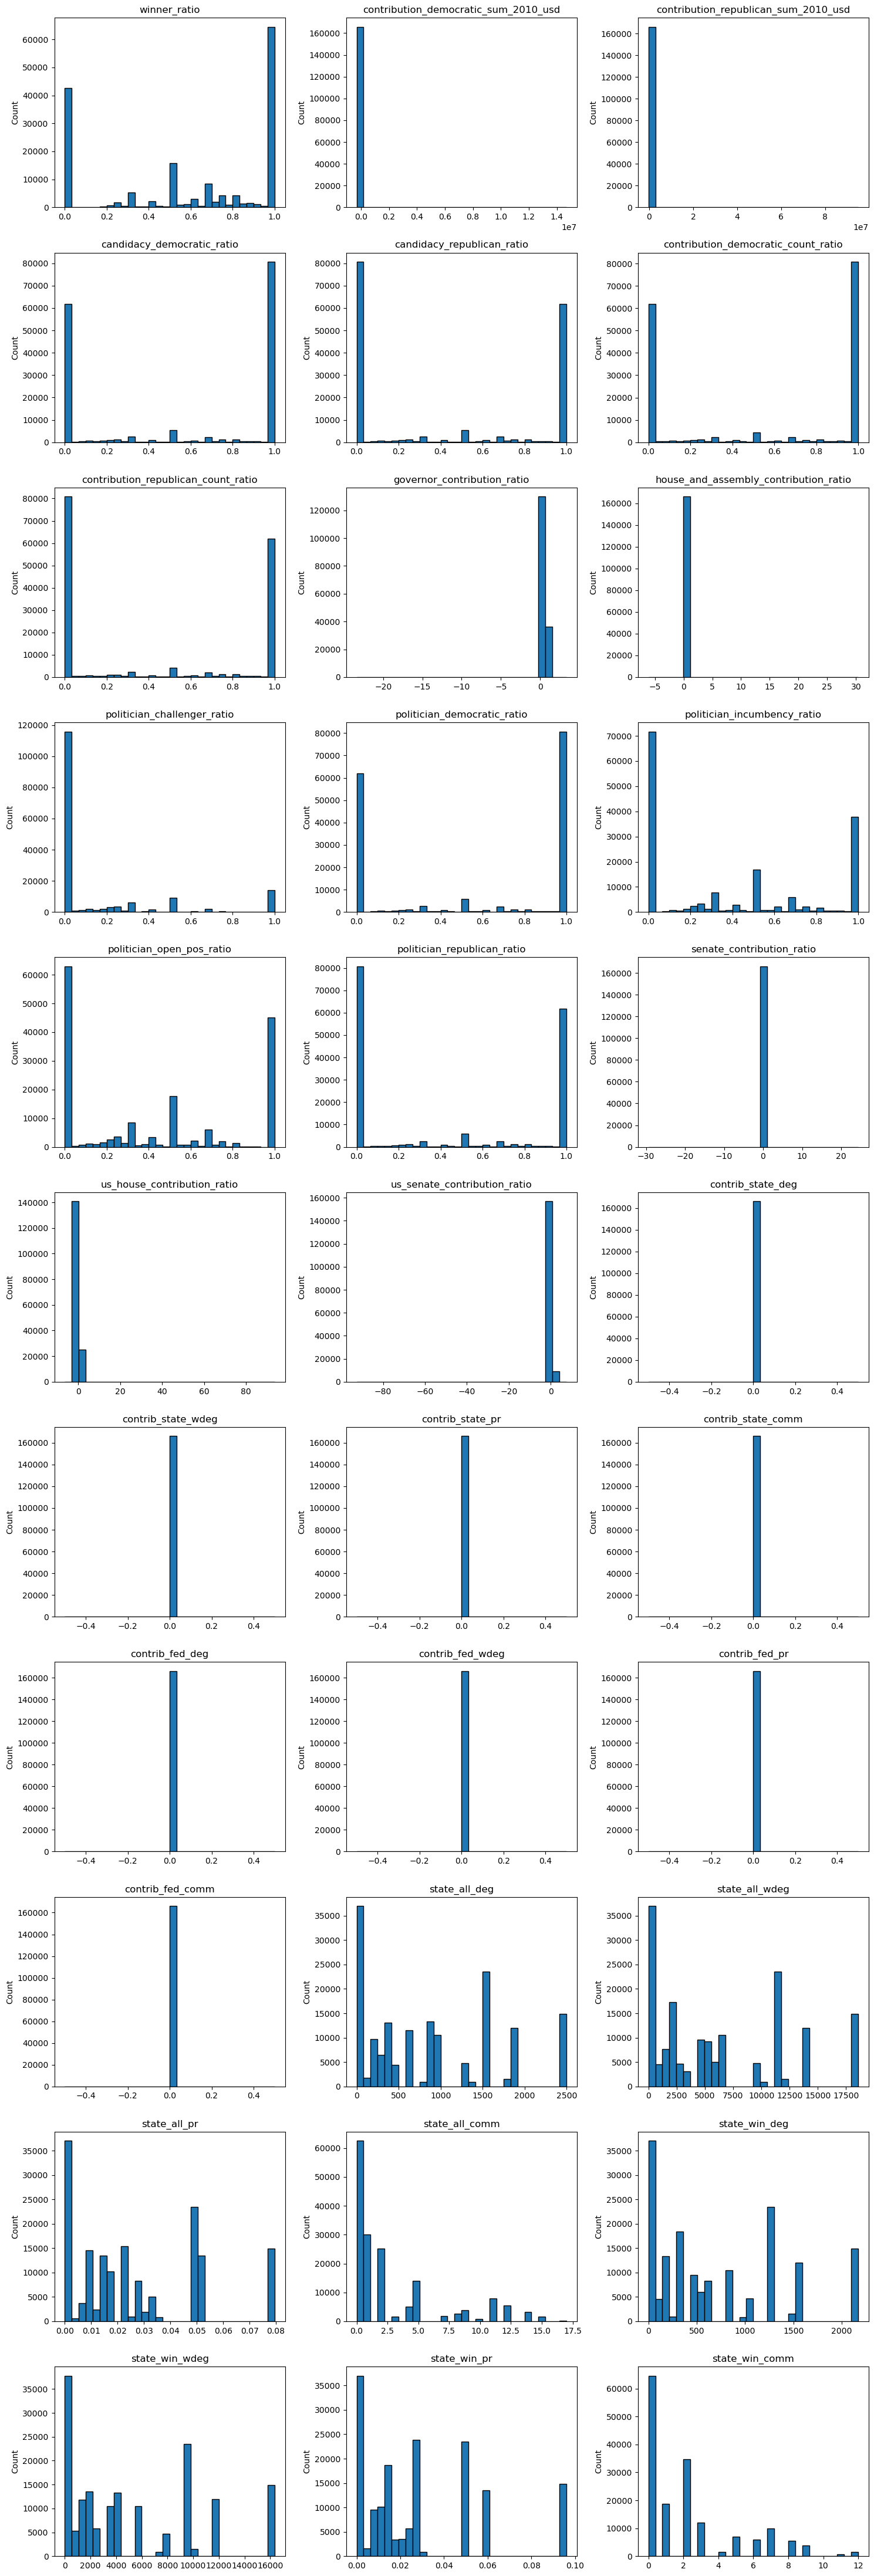

In [807]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


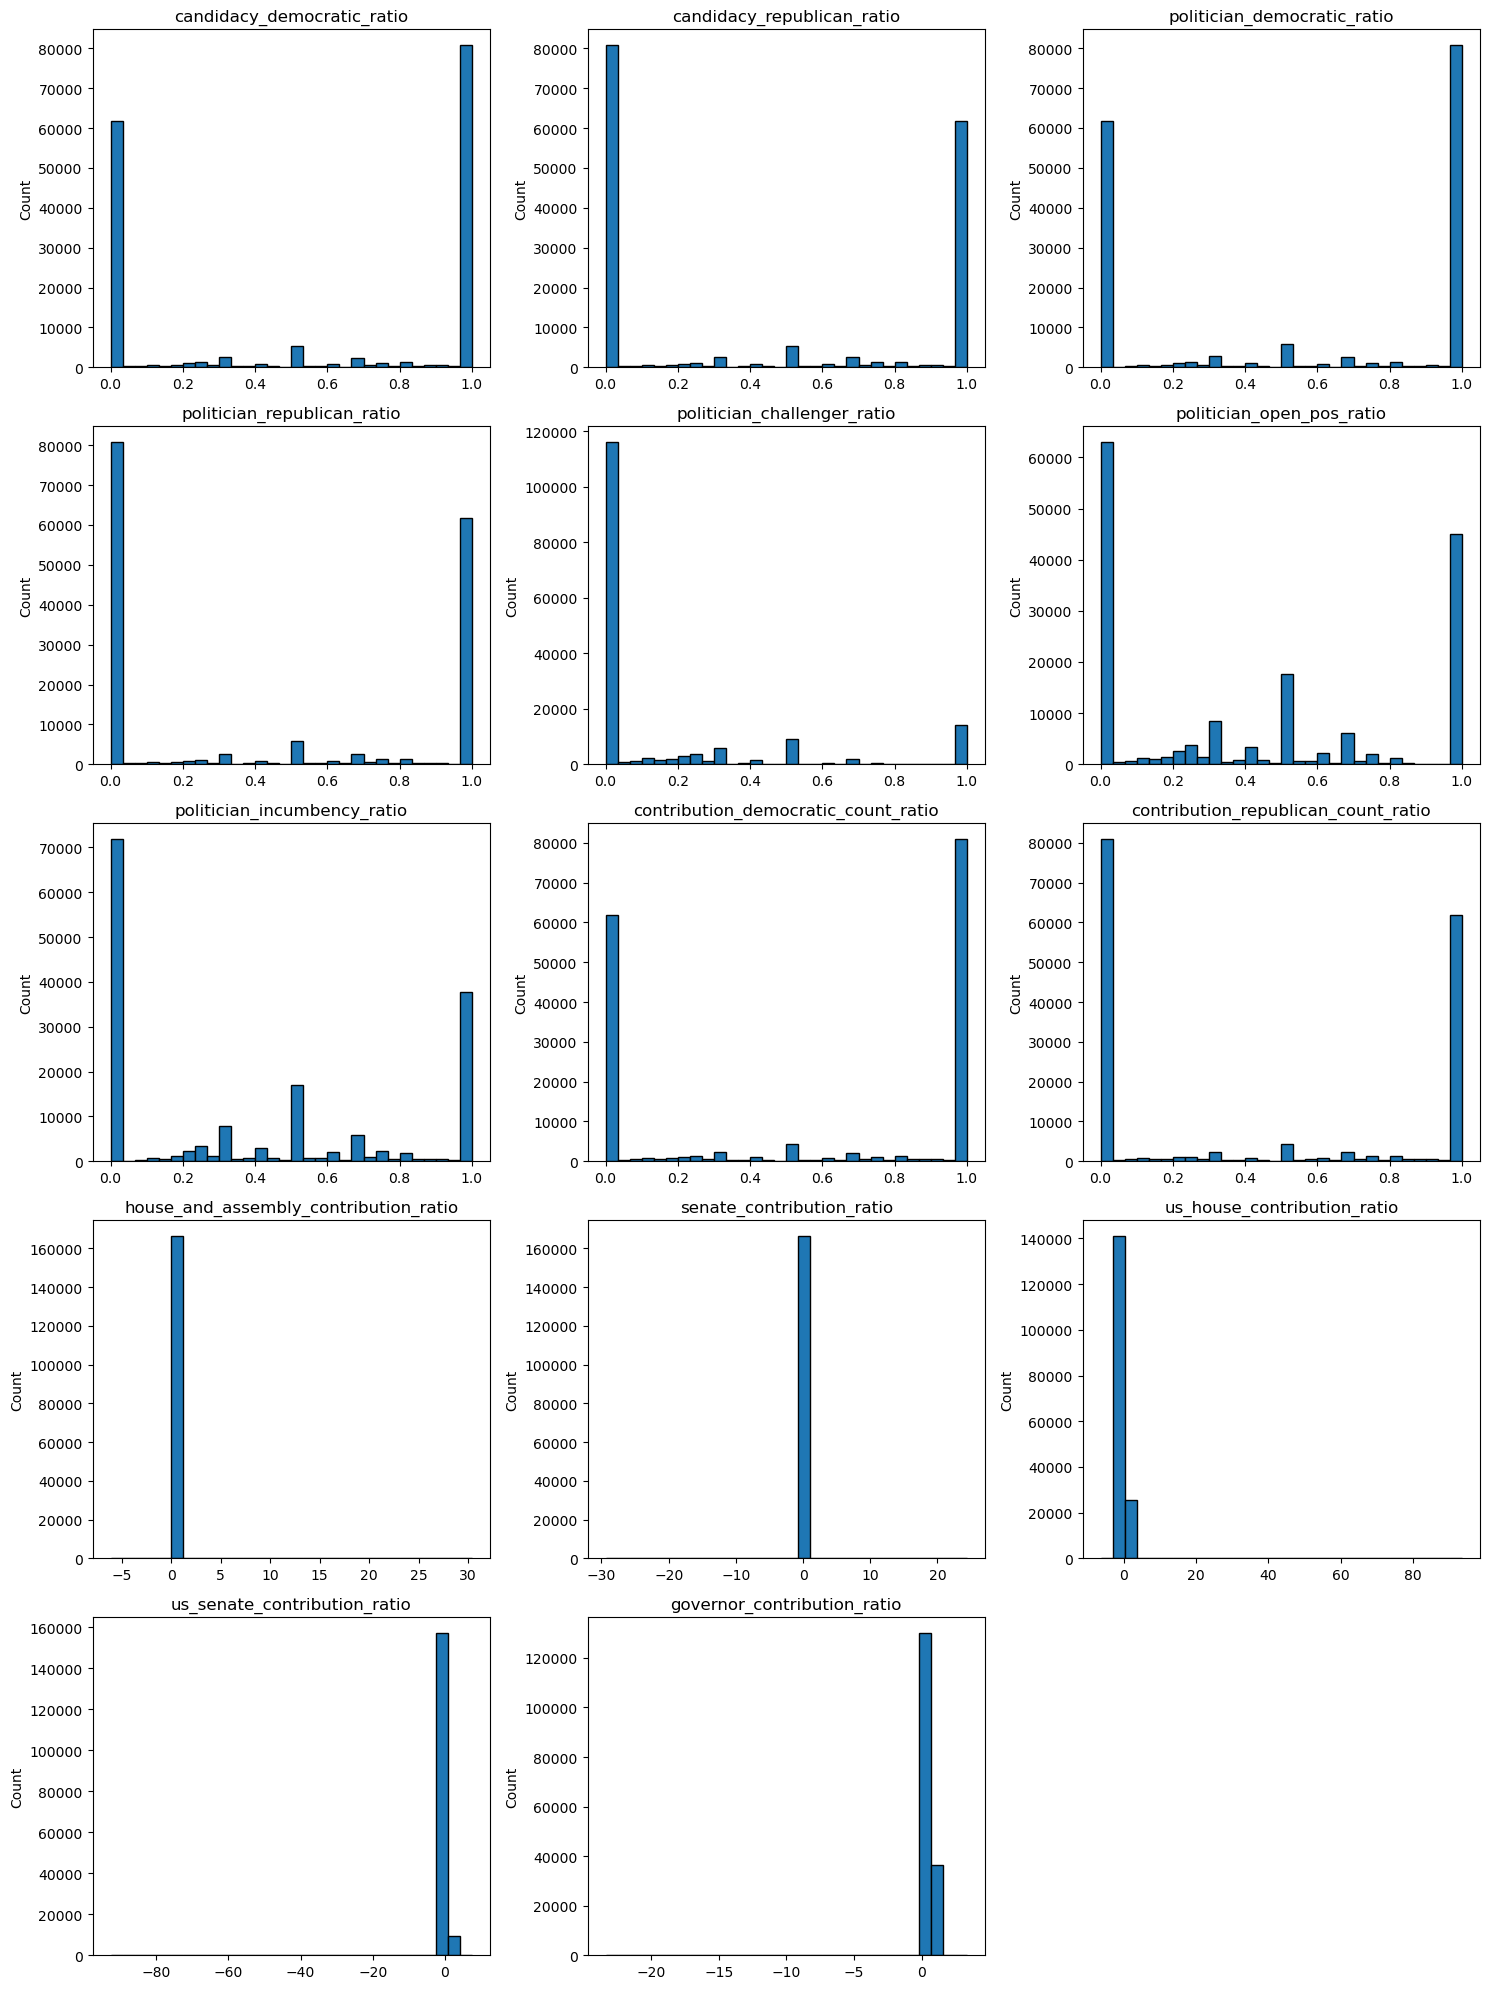

In [808]:

plot_histograms(train, ratio_cols)


## Treat ratio columns to fix skewness or zero and 1 inflated data

In [809]:
import numpy as np
import pandas as pd


THRESH = 0.10
target = "winner_ratio"

# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

train = engineer_selected(train, selected_raw)
test = engineer_selected(test, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in train.columns if c.startswith(col)]
train.drop(columns=to_drop, inplace=True)


# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(train.columns.tolist())



Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.488061
politician_challenger_ratio      0.319815
politician_open_pos_ratio        0.254705
governor_contribution_ratio      0.137031
 

 Final columns after ratio selection:
['state', 'winner_ratio', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'general_sector_new', 'contributor_type_Non-Individual', 'contributor_type_Other', 'politician_challenger_ratio_is_zero', 'politician_cha

In [810]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [811]:
train.columns

Index(['state', 'winner_ratio', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm', 'general_sector_new',
       'contributor_type_Non-Individual', 'contributor_type_Other',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_c

In [812]:
import numpy as np
import pandas as pd

def create_feature_lists(df: pd.DataFrame,
                         target: str = "winner_ratio",
                         cat_prefixes=None):
    if cat_prefixes is None:
        cat_prefixes = ["general_sector", "contributor_type"]

    # 1) logit columns
    logit_vars = [c for c in df.columns if c.endswith("_logit")]

    # 2) binary‑flag columns
    binary_flag_vars = [c for c in df.columns
                        if c.endswith("_is_zero") or c.endswith("_is_one")]

    # 3) encoded categorical vars by prefix
    cat_vars = [c for c in df.columns
                if any(c.startswith(pref) for pref in cat_prefixes)]

    # 4) numeric columns (ints & floats)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # 5) train_num_vars: all numeric except target, cat_vars, binary_flag_vars
    train_num_vars = [
        c for c in num_cols
        if c not in cat_vars + binary_flag_vars + [target]
    ]

    return {
        "logit_vars":       logit_vars,
        "binary_flag_vars": binary_flag_vars,
        "cat_vars":         cat_vars,
        "tar_var":          target,
        "train_num_vars":   train_num_vars
    }

# Example usage:
features = create_feature_lists(train)

print("Logit vars:      ", features["logit_vars"])
print("Binary flags:    ", features["binary_flag_vars"])
print("Categoricals:    ", features["cat_vars"])
print("Target:          ", features["tar_var"])
print("Numeric features:", features["train_num_vars"])



Logit vars:       ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']
Binary flags:     ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']
Categoricals:     ['general_sector_new', 'contributor_type_Non-Individual', 'contributor_type_Other']
Target:           winner_ratio
Numeric features: ['contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr'

### Treat Network data columns

In [813]:
train.columns

Index(['state', 'winner_ratio', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm', 'general_sector_new',
       'contributor_type_Non-Individual', 'contributor_type_Other',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_c

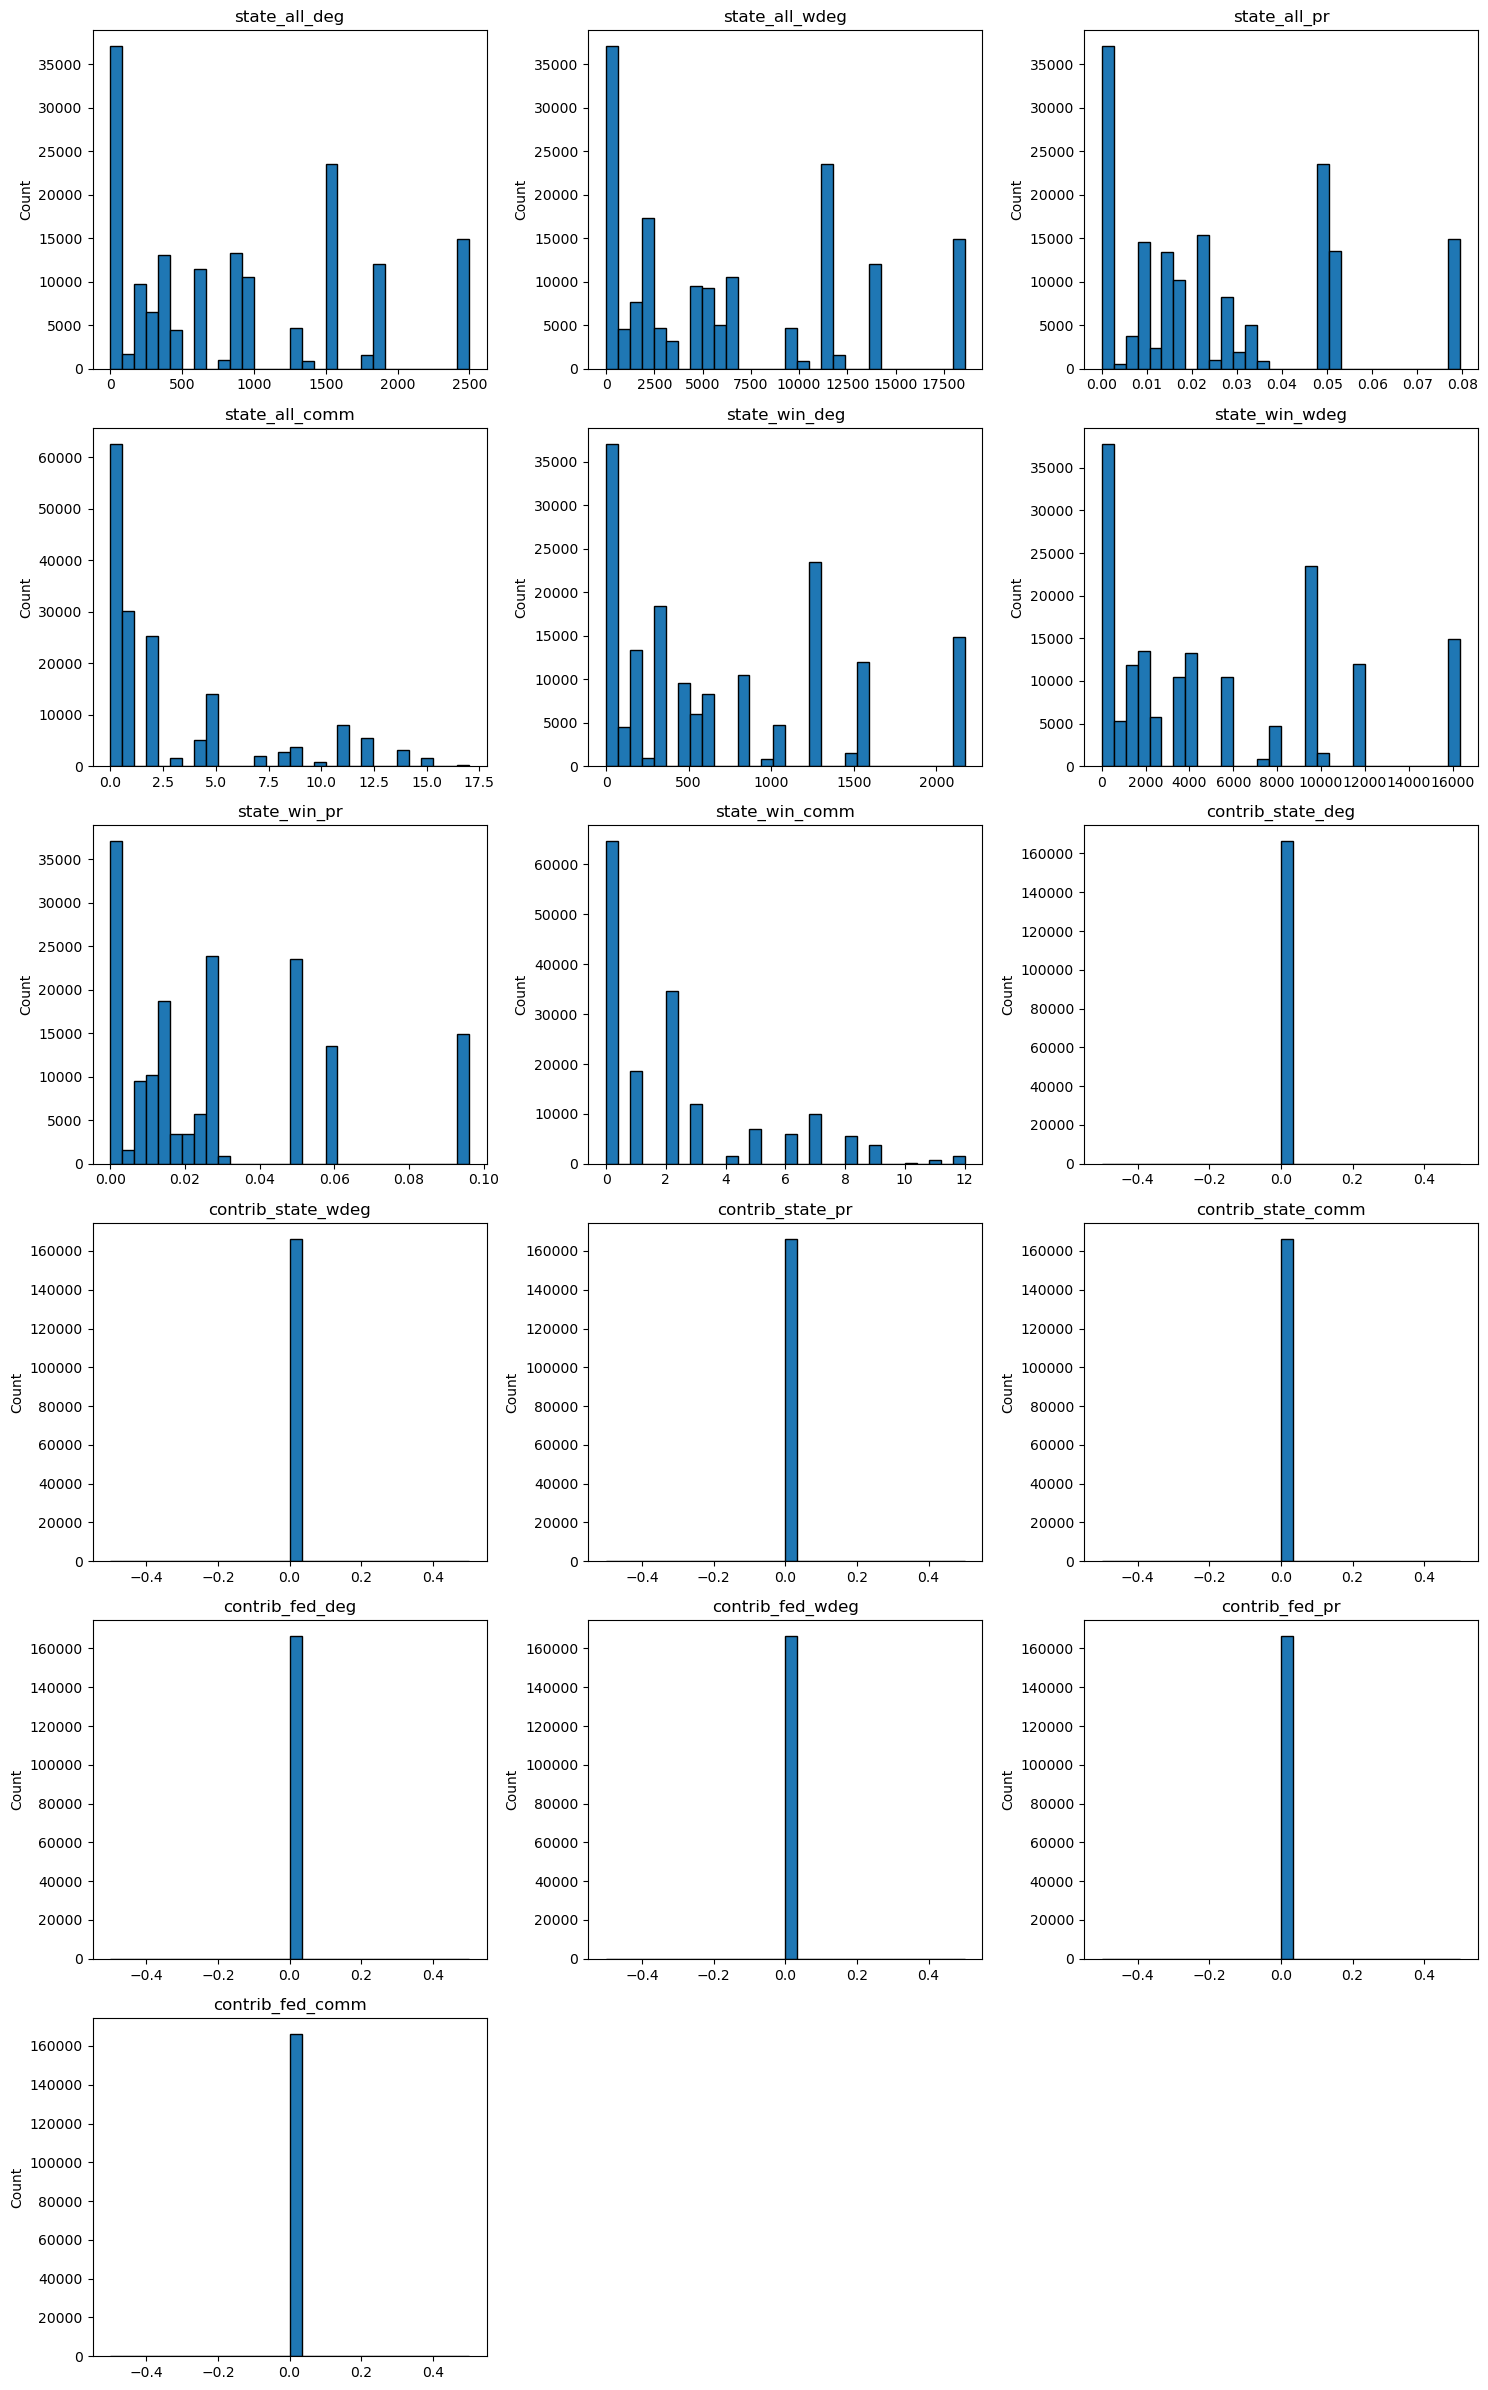

In [814]:

network_cols = [
    'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
    'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
    'contrib_fed_deg',  'contrib_fed_wdeg',  'contrib_fed_pr',  'contrib_fed_comm'
]

plot_histograms(train, network_cols)


In [815]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# ---------------------------------
# 2. Drop columns with zero variance
# ---------------------------------
non_constant = [c for c in network_cols if train[c].std(skipna=True) > 0]
print(f"Dropping {len(network_cols) - len(non_constant)} constant columns")

# ---------------------------------
# 3. Apply a skew‑reducing transform
#    a) log1p  (good for strictly‑positive features with many zeros)
#    b) Yeo‑Johnson (handles negatives too; uncomment if needed)
# ---------------------------------
X = train[non_constant].copy()

# a) log1p
X_log  = np.log1p(X)

# b) Yeo‑Johnson – uncomment if you have negatives
# pt     = PowerTransformer(method="yeo-johnson", standardize=False)
# X_log  = pd.DataFrame(pt.fit_transform(X), columns=non_constant, index=train.index)

# ---------------------------------
# 4. Correlation with the target
# ---------------------------------
y = train['winner_ratio']

pearson  = X_log.apply(lambda col: col.corr(y, method='pearson')).sort_values(ascending=False)
spearman = X.apply  (lambda col: col.corr(y, method='spearman')).sort_values(ascending=False)

print("\n=== Pearson (after log1p) ===")
print(pearson)

print("\n=== Spearman (rank‑based, raw values) ===")
print(spearman)


Dropping 8 constant columns

=== Pearson (after log1p) ===
state_win_comm    0.007294
state_all_comm    0.005211
state_all_wdeg   -0.014533
state_win_wdeg   -0.015299
state_all_deg    -0.016563
state_win_deg    -0.017559
state_win_pr     -0.032553
state_all_pr     -0.038107
dtype: float64

=== Spearman (rank‑based, raw values) ===
state_win_comm    0.010178
state_all_comm   -0.003357
state_all_deg    -0.012748
state_win_wdeg   -0.012795
state_win_deg    -0.013261
state_all_wdeg   -0.013273
state_win_pr     -0.015181
state_all_pr     -0.017983
dtype: float64


In [816]:
from sklearn.preprocessing import PowerTransformer

# 1) fit Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson", standardize=False)
X_yeo = pd.DataFrame(pt.fit_transform(train[non_constant]),
                     columns=non_constant, index=train.index)

# 2) Pearson corr on Yeo‑Johnson
pearson_yeo = X_yeo.apply(lambda col: col.corr(train['winner_ratio'], method='pearson'))
print("Pearson after Yeo‑Johnson:\n", pearson_yeo.sort_values(ascending=False))


Pearson after Yeo‑Johnson:
 state_win_comm    0.004449
state_all_comm   -0.003177
state_all_wdeg   -0.029796
state_win_wdeg   -0.029854
state_win_deg    -0.030521
state_all_deg    -0.030768
state_win_pr     -0.041155
state_all_pr     -0.041959
dtype: float64


#### Dropping network related metrics, since they're found to be very less correlated with winner_ratio

In [817]:
train.drop(network_cols, axis=1, inplace= True)
test.drop(network_cols, axis=1, inplace= True)

In [818]:
for col in network_cols:
    features['train_num_vars'].remove(col)
    # features['test_num_vars'].remove(col)

In [837]:
train['contribution_total_sum_2010_usd'] = train['contribution_democratic_sum_2010_usd'] + train['contribution_republican_sum_2010_usd']
test['contribution_total_sum_2010_usd'] = test['contribution_democratic_sum_2010_usd'] + test['contribution_republican_sum_2010_usd']

features['train_num_vars'].append("contribution_total_sum_2010_usd")
# features['test_num_vars'].append("contribution_total_sum_2010_usd")

In [838]:
import numpy as np
import pandas as pd

 # 1) Total‑sum already exists; ensure log1p column
money_sums = [
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
]

def add_share_features(df, money_sums):
    for col in money_sums:
        df[f"{col}_log"] = np.log1p(df[col])
        df[f"{col}_is_zero"] = (df[col] == 0).astype(int)

    # 2) Partisan share of dollars
    denom = df["contribution_total_sum_2010_usd"].replace(0, np.nan)
    df["dem_sum_ratio"] = (
        df["contribution_democratic_sum_2010_usd"] / denom
    ).fillna(0)

    df["rep_sum_ratio"] = (
        df["contribution_republican_sum_2010_usd"] / denom
    ).fillna(0)

    # 3) Optional: logit of the share (avoid 0/1 with shrinkage)
    eps = 1e-6
    for col in ["dem_sum_ratio", "rep_sum_ratio"]:
        df[f"{col}_logit"] = np.log((df[col] + eps) / (1 - df[col] + eps))

    return df

train = add_share_features(train, money_sums)
test  = add_share_features(test, money_sums)


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/env3.11/lib/python3.11/site

In [839]:
features['train_num_vars']

['contribution_democratic_sum_2010_usd',
 'contribution_republican_sum_2010_usd',
 'politician_challenger_ratio_logit',
 'politician_open_pos_ratio_logit',
 'politician_incumbency_ratio_logit',
 'governor_contribution_ratio_logit',
 'contribution_total_sum_2010_usd',
 'contribution_democratic_sum_2010_usd_log',
 'contribution_republican_sum_2010_usd_log',
 'contribution_total_sum_2010_usd_log',
 'dem_sum_ratio_logit',
 'contribution_total_sum_2010_usd']

In [840]:
features['binary_flag_vars']

['politician_challenger_ratio_is_zero',
 'politician_challenger_ratio_is_one',
 'politician_open_pos_ratio_is_zero',
 'politician_open_pos_ratio_is_one',
 'politician_incumbency_ratio_is_zero',
 'politician_incumbency_ratio_is_one',
 'governor_contribution_ratio_is_zero',
 'governor_contribution_ratio_is_one',
 'contribution_democratic_sum_2010_usd_is_zero',
 'contribution_republican_sum_2010_usd_is_zero',
 'contribution_total_sum_2010_usd_is_zero',
 'dem_sum_ratio_is_zero',
 'dem_sum_ratio_is_one']

In [841]:
linear_model_keep = [
    # 1) magnitude of money (compressed)
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

    # 2) wasn’t zero? (flag)
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
    "contribution_total_sum_2010_usd_is_zero",

    # 3) partisan dollar share (dem only), logit‐transformed
    "dem_sum_ratio_logit",

    # 4) share boundary flags
    "dem_sum_ratio_is_zero",
    "dem_sum_ratio_is_one",
]

tree_model_keep =  [
    # raw sums — trees love them
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",

    # zero‐flags (optional but sometimes helpful)
    "contribution_total_sum_2010_usd_is_zero",

    # raw share ratio
    "dem_sum_ratio",
]


In [842]:
# split flags vs everything else
binary_flags = [c for c in linear_model_keep 
                if c.endswith("_is_zero") or c.endswith("_is_one")]
other_vars   = [c for c in linear_model_keep if c not in binary_flags]

# store back into your features dict
features["binary_flag_vars"] += binary_flags
features["train_num_vars"]   += other_vars

# inspect
print("binary_flag_vars:", features["binary_flag_vars"])
print("train_num_vars:  ", features["train_num_vars"])

binary_flag_vars: ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one', 'contribution_democratic_sum_2010_usd_is_zero', 'contribution_republican_sum_2010_usd_is_zero', 'contribution_total_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero', 'dem_sum_ratio_is_one', 'contribution_democratic_sum_2010_usd_is_zero', 'contribution_republican_sum_2010_usd_is_zero', 'contribution_total_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero', 'dem_sum_ratio_is_one']
train_num_vars:   ['contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd', 'contribution_democra

In [843]:

features["cat_vars"]

['general_sector_new',
 'contributor_type_Non-Individual',
 'contributor_type_Other']

In [844]:
train.columns

Index(['state', 'winner_ratio', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'general_sector_new',
       'contributor_type_Non-Individual', 'contributor_type_Other',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_is_zero',
       'contribut

In [845]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):
   
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize[0], figsize[1]*rows), squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].dropna()
        # drop non-finite
        data = data[np.isfinite(data)]
        if data.empty:
            ax.set_title(f"{col}\n(no data)")
            continue

        mn, mx = data.min(), data.max()

        # decide linear vs log
        if mn >= 0 and mx/mn if mn>0 else np.inf > wide_range_factor:
            # log‐scale histogram
            # protect against zeros by starting at a small positive epsilon
            low = mn if mn>0 else data[data>0].min()
            edges = np.logspace(np.log10(low), np.log10(mx), bins)
            ax.hist(data, bins=edges, edgecolor='black')
            ax.set_xscale('log')
            ax.set_title(f"{col}\n(log scale)")
        else:
            # linear histogram
            ax.hist(data, bins=bins, range=(mn, mx), edgecolor='black')
            ax.set_title(col)

        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=30)

    # remove any extra subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


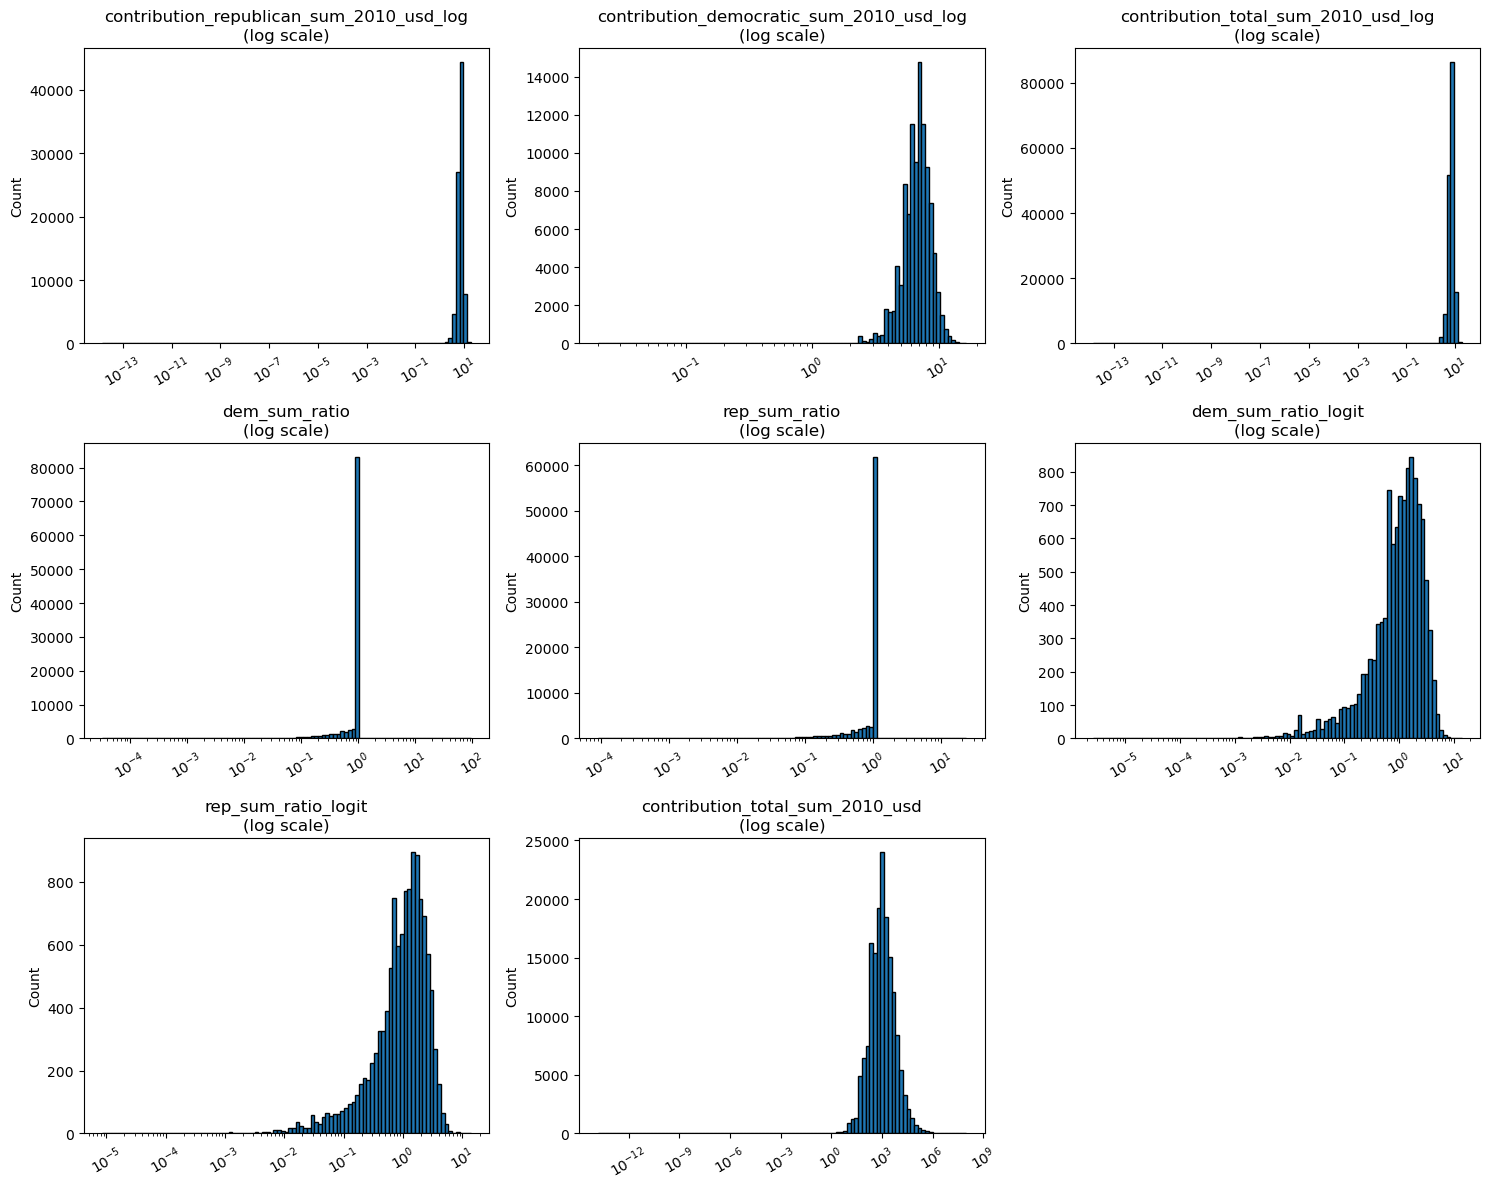

In [846]:
money_sums = [
    'contribution_republican_sum_2010_usd_log', 'contribution_democratic_sum_2010_usd_log',
   'contribution_total_sum_2010_usd_log', 'dem_sum_ratio',
       'rep_sum_ratio', 'dem_sum_ratio_logit', 'rep_sum_ratio_logit','contribution_total_sum_2010_usd'
]
# plot_histograms(train, money_sums)
plot_histograms(train, money_sums, bins=100, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

## Check skewness in features

In [847]:
train_bkp = train.copy()

In [848]:
train.columns

Index(['state', 'winner_ratio', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'general_sector_new',
       'contributor_type_Non-Individual', 'contributor_type_Other',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_is_zero',
       'contribut

In [849]:
import numpy as np
from scipy.stats import skew

# 1) List all nonnegative columns you’d like to check
to_check = [
    'contribution_democratic_sum_2010_usd',"contribution_republican_sum_2010_usd",
    'contribution_total_sum_2010_usd'
]

# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in to_check}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")



Pre‑log1p skewness:
  contribution_democratic_sum_2010_usd  98.195
  contribution_republican_sum_2010_usd  302.835
  contribution_total_sum_2010_usd  254.864


## Check VIF among numerical columns

In [850]:
features.keys()

dict_keys(['logit_vars', 'binary_flag_vars', 'cat_vars', 'tar_var', 'train_num_vars'])

In [851]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[features['train_num_vars']].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": features['train_num_vars'], 
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                                     feature           VIF
1       contribution_republican_sum_2010_usd  1.725517e+12
8   contribution_republican_sum_2010_usd_log  7.157091e+11
13  contribution_republican_sum_2010_usd_log  5.009566e+11
6            contribution_total_sum_2010_usd  8.741968e+10
11           contribution_total_sum_2010_usd  5.730645e+10
7   contribution_democratic_sum_2010_usd_log  7.596672e+08
9        contribution_total_sum_2010_usd_log  1.804070e+08
12  contribution_democratic_sum_2010_usd_log  1.120034e+08
0       contribution_democratic_sum_2010_usd  3.710089e+07
14       contribution_total_sum_2010_usd_log  2.516726e+07
10                       dem_sum_ratio_logit  1.720736e+07
15                       dem_sum_ratio_logit  3.467520e+06
2          politician_challenger_ratio_logit  4.519500e+00
3            politician_open_pos_ratio_logit  4.141592e+00
4          politician_incumbency_ratio_logit  3.981244e+00
5          governor_contrib

In [1106]:
drop_nan_vif = [
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
    'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm'
]


train = train.drop(columns=drop_nan_vif, axis=1)
test = test.drop(columns=drop_nan_vif, axis=1)

train_num_vars = [col for col in train_num_vars + nw_vars if col not in drop_nan_vif]
test_num_vars = [col for col in test_num_vars + nw_vars if col not in drop_nan_vif]

X = train[train_num_vars].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": train_num_vars,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# 1) List all features with VIF > 10
high_vif = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
print("Drop these due to high multicollinearity:\n", high_vif)

# 2) List features with VIF ≤ 10 → your selected set
selected_num_vars = vif_data[vif_data["VIF"] <= 10]["feature"].tolist()
print("\nKeep these numeric predictors:\n", selected_num_vars)

Drop these due to high multicollinearity:
 ['state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_win_deg', 'state_win_wdeg', 'state_win_pr']

Keep these numeric predictors:
 ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit', 'contribution_total_sum', 'state_all_comm', 'state_win_comm']


In [1107]:


train = train.drop(columns=high_vif, axis=1)
test = test.drop(columns=high_vif, axis=1)

nw_vars = [col for col in nw_vars if col not in high_vif]


In [1108]:
train_num_vars = list(set(train.columns) - set(cat_vars) - set(binar_flags))
train_num_vars

['contribution_total_sum',
 'politician_incumbency_ratio_logit',
 'state_win_comm',
 'state_all_comm',
 'politician_challenger_ratio_logit',
 'governor_contribution_ratio_logit',
 'winner_ratio',
 'politician_open_pos_ratio_logit']

## Check correlation of numerical variables with target variable

In [1109]:

# Calculate correlations
correlations = train[train_num_vars].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
winner_ratio                         1.000000
politician_incumbency_ratio_logit    0.501392
politician_challenger_ratio_logit   -0.316840
politician_open_pos_ratio_logit     -0.248582
governor_contribution_ratio_logit   -0.143858
contribution_total_sum               0.139619
state_win_comm                       0.007366
state_all_comm                       0.005247
dtype: float64


In [1110]:
# 1) compute Spearman correlations against the target
spearman = train[train_num_vars].corr(method="spearman")["winner_ratio"]
spearman

contribution_total_sum               0.070963
politician_incumbency_ratio_logit    0.488075
state_win_comm                       0.010229
state_all_comm                      -0.003339
politician_challenger_ratio_logit   -0.319811
governor_contribution_ratio_logit   -0.137076
winner_ratio                         1.000000
politician_open_pos_ratio_logit     -0.254731
Name: winner_ratio, dtype: float64

In [1112]:
# 1) compute Spearman correlations against the target
spearman = train[train_num_vars].corr(method="spearman")["winner_ratio"]

# 2) find which features are “weak” (|ρ| < .10) or NaN (e.g. network NaNs)
weak_feats = spearman[
    (spearman.abs() < 0.05) | (spearman.isna())
].index.tolist()

print("Will drop (|ρ|<0.10 or NaN):\n ", weak_feats)

# 3) drop them in one go
train = train.drop(columns=weak_feats)
# test = test.drop(columns=weak_feats, axis=1)

# 4) (optional) list what remains
keep_feats = [c for c in train.columns if c != "winner_ratio"]
print("\nKept features:\n ", keep_feats)


Will drop (|ρ|<0.10 or NaN):
  ['state_win_comm', 'state_all_comm']

Kept features:
  ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit', 'contribution_total_sum', 'general_sector', 'specific_sector', 'state', 'contributor_type_Non-Individual', 'contributor_type_Other', 'politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']


In [1113]:


train_num_vars = [col for col in train_num_vars if col not in weak_feats]
test_num_vars = [col for col in test_num_vars if col not in weak_feats]

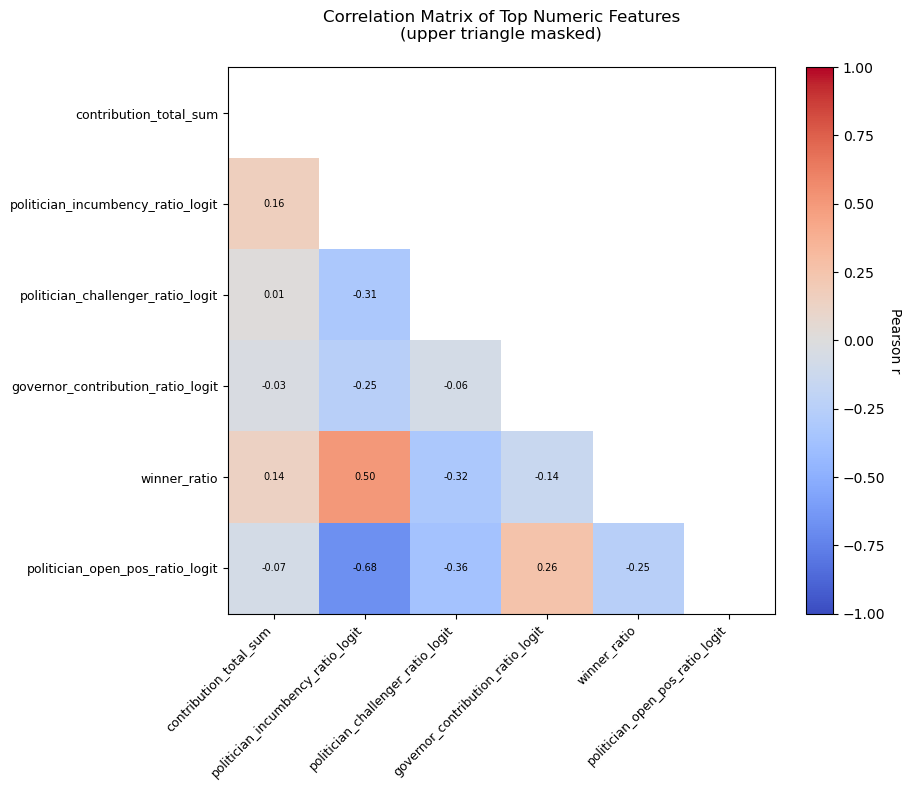

In [1114]:
import matplotlib.pyplot as plt


# 2) Compute the correlation matrix
corr = train[train_num_vars].corr()

# 3) Build a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4) Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap, masking out the upper triangle
cmap = plt.get_cmap('coolwarm')
im = ax.imshow(np.ma.masked_where(mask, corr), 
               cmap=cmap, vmin=-1, vmax=1)

# Set tick labels
ax.set_xticks(np.arange(len(train_num_vars)))
ax.set_yticks(np.arange(len(train_num_vars)))
ax.set_xticklabels(train_num_vars, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(train_num_vars, fontsize=9)

# Annotate each cell in the lower triangle with its correlation value
for i in range(len(train_num_vars)):
    for j in range(len(train_num_vars)):
        if not mask[i, j]:  # only annotate lower triangle
            val = corr.iloc[i, j]
            ax.text(j, i, f"{val:.2f}", ha='center', va='center',
                    color='black', fontsize=7)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r", rotation=270, labelpad=12)

ax.set_title("Correlation Matrix of Top Numeric Features\n(upper triangle masked)", pad=20)
plt.tight_layout()
plt.show()

RF trees: 100%|██████████| 1000/1000 [01:06<00:00, 14.93it/s]


Training RMSE: 0.1012
Validation RMSE: 0.1058


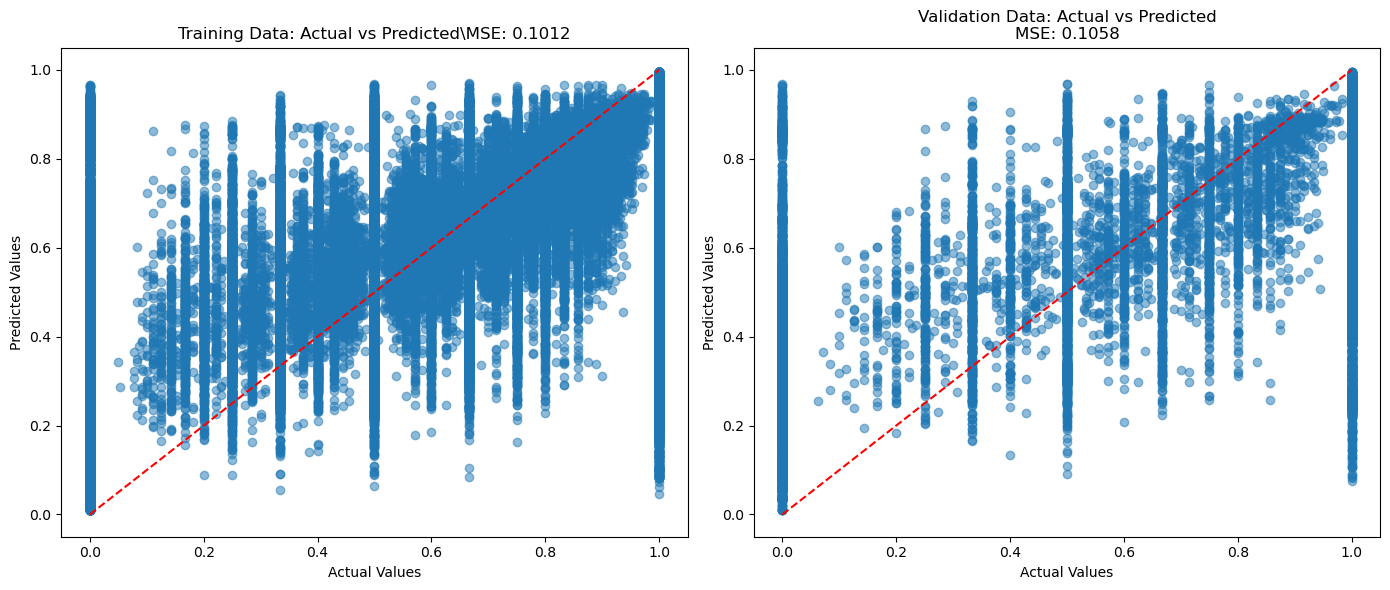

In [1126]:
# ------------------------------------------------------------------
# 8. Train/test/validation split for modeling
# ------------------------------------------------------------------
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ✅ Step 1: Define your features (X) and target (y)
X = train.drop(columns=['winner_ratio'])  # replace with your actual target column name
y= train['winner_ratio']

# ✅ Step 2: Train-validation split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

# ------------------------------------------------------------------
# 9. Train Random Forest model directly (no hyperparameter tuning)
# ------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# Create and train a Random Forest model with default parameters
from tqdm.auto import tqdm
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators      = 1,
    warm_start        = True,
    random_state      = 42,
    n_jobs            = -1,
    max_depth         = 12,
    min_samples_split = 5,
    min_samples_leaf  = 3,
    max_features      = "sqrt"
)

pbar = tqdm(total=1000, desc="RF trees")
for i in range(1, 1001):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)
    pbar.update(1)
pbar.close()

# Make predictions on train and validation sets
train_pred = rf.predict(X_train)
val_pred = rf.predict(X_val)

# Calculate RMSE for both sets
train_rmse = metrics.mean_squared_error(y_train, train_pred)
val_rmse = metrics.mean_squared_error(y_val, val_pred)

print(f"Training RMSE: {train_rmse:,.4f}")
print(f"Validation RMSE: {val_rmse:,.4f}")

# ------------------------------------------------------------------
# Plot actual vs predicted values for train and validation data
# ------------------------------------------------------------------
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Training data plot
ax1.scatter(y_train, train_pred, alpha=0.5)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title(f'Training Data: Actual vs Predicted\MSE: {train_rmse:.4f}')

# Validation data plot
ax2.scatter(y_val, val_pred, alpha=0.5)
ax2.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title(f'Validation Data: Actual vs Predicted\nMSE: {val_rmse:.4f}')

plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

In [1124]:
from sklearn.experimental import enable_halving_search_cv  # noqa F401
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble         import RandomForestRegressor
from sklearn.metrics          import mean_squared_error
import matplotlib.pyplot      as plt

search = HalvingGridSearchCV(
    estimator   = RandomForestRegressor(random_state=42),
    param_grid  = {
        'n_estimators':      [500, 1000, 1500],
        'max_depth':         [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf':  [1, 2, 4],
        'max_features':      ['sqrt','log2'],
    },
    factor    = 3,
    cv        = 3,
    scoring   = 'neg_mean_squared_error',
    verbose   = 2,    # shows the halving progress
    n_jobs    = -1,
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV MSE:", -search.best_score_)



n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1539
max_resources_: 124671
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 1539
Fitting 3 folds for each of 162 candidates, totalling 486 fits


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=Non

Train  MSE: 0.1044
Val    MSE: 0.1080


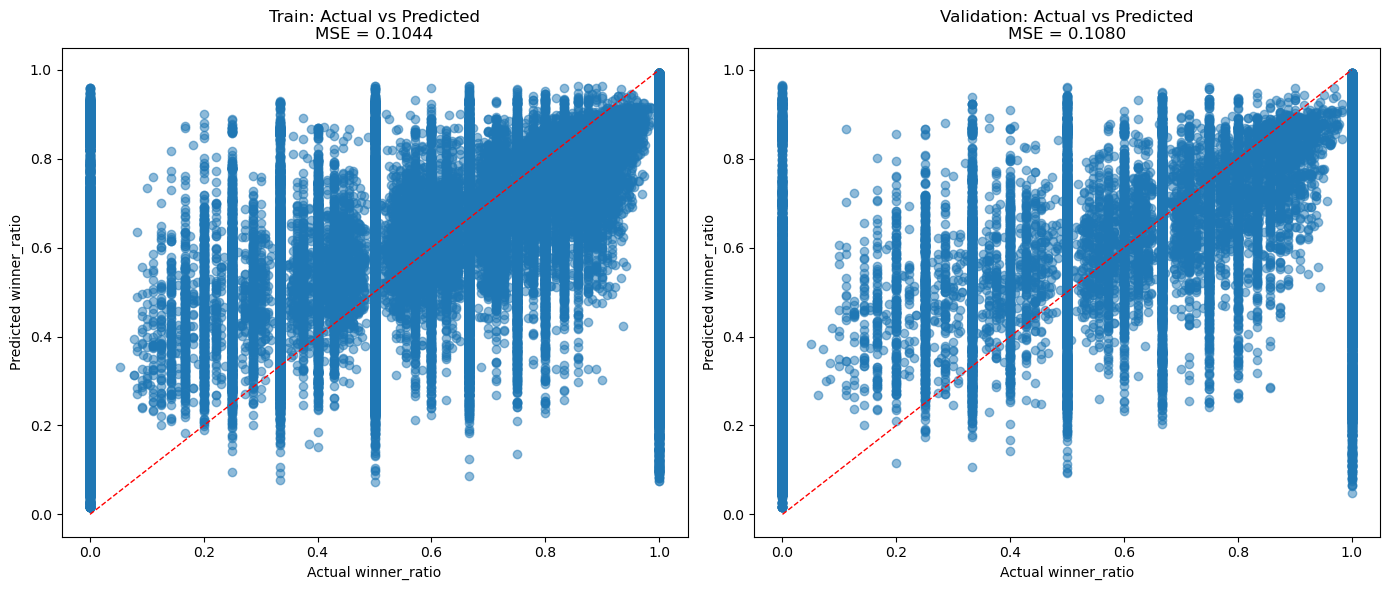

In [1125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ─── 1) Rebuild the model with your best parameters ──────────────────────
best_params = {
    'n_estimators':      1000,
    'max_depth':         10,
    'min_samples_split': 10,
    'min_samples_leaf':  2,
    'max_features':      'sqrt'
}

rf_best = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    **best_params
)

# ─── 2) Fit on the full training set ────────────────────────────────────
rf_best.fit(X_train, y_train)

# ─── 3) Predict on train & validation ─────────────────────────────────
train_pred = rf_best.predict(X_train)
val_pred   = rf_best.predict(X_val)

# ─── 4) Compute MSE ─────────────────────────────────────────────────────
mse_train = mean_squared_error(y_train, train_pred)
mse_val   = mean_squared_error(y_val,   val_pred)

print(f"Train  MSE: {mse_train:.4f}")
print(f"Val    MSE: {mse_val:.4f}")

# ─── 5) Plot Actual vs Predicted ───────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Training set
ax1.scatter(y_train, train_pred, alpha=0.5)
ax1.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', linewidth=1)
ax1.set_title(f"Train: Actual vs Predicted\nMSE = {mse_train:.4f}")
ax1.set_xlabel("Actual winner_ratio")
ax1.set_ylabel("Predicted winner_ratio")

# Validation set
ax2.scatter(y_val, val_pred, alpha=0.5)
ax2.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         'r--', linewidth=1)
ax2.set_title(f"Validation: Actual vs Predicted\nMSE = {mse_val:.4f}")
ax2.set_xlabel("Actual winner_ratio")
ax2.set_ylabel("Predicted winner_ratio")

plt.tight_layout()
plt.show()


In [1122]:
# ✅ Necessary imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# ✅ Define the grid of hyperparameters to search
param_grid = {
    # number of trees
    'n_estimators': [500, 1000, 1500],

    # tree depth: None = expand until leaves are pure (or other stopping criteria),
    # plus a few fixed depths
    'max_depth': [None, 10, 20],

    # minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10],

    # minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 4],

    # number of features to consider at each split:
    # 'sqrt' is the default for regression, but you can also try log2 or a fraction
    'max_features': ['sqrt', 'log2']

}

from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.ensemble          import RandomForestRegressor
from sklearn.metrics           import mean_squared_error
from tqdm.auto                 import tqdm
import matplotlib.pyplot       as plt

# 1) turn your param_grid into a list of dicts
param_list = list(ParameterGrid(param_grid))

best_score = float("inf")
best_params = None

# 2) wrap the loop in tqdm
for params in tqdm(param_list, desc="Grid search"):
    # a fresh RF for each combo
    model = RandomForestRegressor(
        random_state=42,
        n_jobs=-1,
        **params
    )
    # 3‑fold CV on neg MSE
    scores = cross_val_score(
        model, X_train, y_train,
        cv=3,
        scoring="neg_mean_squared_error",
        n_jobs=-1
    )
    mean_mse = -scores.mean()
    
    # track the best
    if mean_mse < best_score:
        best_score  = mean_mse
        best_params = params

# 3) report best
print("\nBest params:", best_params)
print("Best CV MSE :", best_score)

# 4) refit & evaluate train/val
rf_final = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    **best_params
).fit(X_train, y_train)

train_pred = rf_final.predict(X_train)
val_pred   = rf_final.predict(X_val)

train_mse = mean_squared_error(y_train, train_pred)
val_mse   = mean_squared_error(y_val,   val_pred)

print(f"\nTrain MSE: {train_mse:.4f}")
print(f"Val   MSE: {val_mse:.4f}")

# 5) plot actual vs pred
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.scatter(y_train, train_pred, alpha=0.4)
ax1.plot([0,1],[0,1],"r--")
ax1.set(title=f"Train (MSE={train_mse:.4f})", xlabel="Actual", ylabel="Predicted")

ax2.scatter(y_val, val_pred, alpha=0.4)
ax2.plot([0,1],[0,1],"r--")
ax2.set(title=f"Val   (MSE={val_mse:.4f})", xlabel="Actual", ylabel="Predicted")

plt.tight_layout()
plt.show()


Grid search:   4%|▍         | 7/162 [05:28<2:01:15, 46.94s/it]


KeyboardInterrupt: 

Train MSE: 0.06028522318995205
Validation MSE: 0.10006120020044282


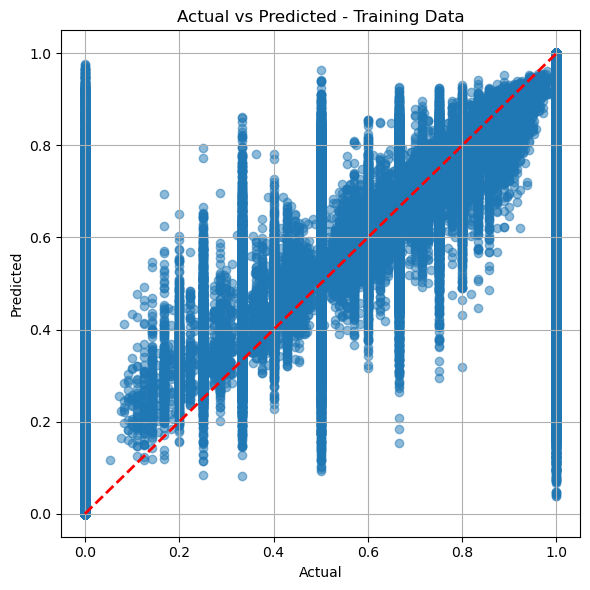

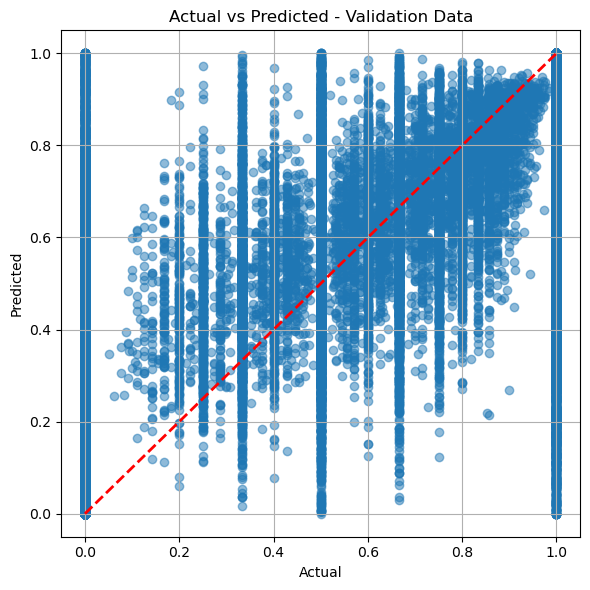

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Initialize Random Forest with fixed parameters
rf_model = RandomForestRegressor(
    n_estimators=45,
    max_depth=25,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# ✅ Fit model
rf_model.fit(X_train, y_train)

# ✅ Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# ✅ Evaluation
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

# ✅ Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(training_data, train_y, test_size=0.25, random_state=42)

# ✅ Hyperparameter grid
param_grid = {
    'n_estimators': range(1, 50, 5),
    'max_depth': range(1, 30, 5),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# ✅ Model and GridSearch
model3 = RandomForestRegressor(random_state=42)
rf_optimized = GridSearchCV(
    estimator=model3,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1
)

# ✅ Fit on training data
rf_optimized.fit(X_train, y_train)

# ✅ Predict
y_train_pred = rf_optimized.predict(X_train)
y_val_pred = rf_optimized.predict(X_val)

# ✅ Evaluate
print("Train MSE:", metrics.mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", metrics.mean_squared_error(y_val, y_val_pred))

# ✅ Plot actual vs. predicted
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Actual vs Predicted - Training Data")
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Data")


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


KeyboardInterrupt: 